# sentiment analysis with pyspark

data preprocessing

In [12]:
import pandas as pd

df = pd.read_csv('Reviews.csv')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df = df.drop(columns=['Id' \
            ,'ProductId' \
            ,'UserId' \
            ,'ProfileName' \
            ,'HelpfulnessNumerator'\
            ,'HelpfulnessDenominator' \
            ,'Time' \
            ,'Summary'] )
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


In [14]:
df['pols'] = [1 if x > 3 else (0 if x == 3 else -1) for x in df['Score']]
df

,Score,Text,pols
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,-1
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,-1
4,5,Great taffy at a great price. There was a wid...,1
...,...,...,...
568449,5,Great for sesame chicken..this is a good if no...,1
568450,2,I'm disappointed with the flavor. The chocolat...,-1
568451,5,"These stars are small, so you can give 10-15 o...",1
568452,5,These are the BEST treats for training and rew...,1


<AxesSubplot:>

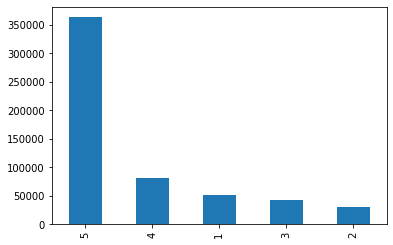

In [15]:
df['Score'].value_counts().plot(kind='bar')

In [16]:
from bs4 import BeautifulSoup
def clean_html(html):
    soup = BeautifulSoup(html, "html.parser")
    for data in soup(['style', 'script', 'code', 'a']):
      data.decompose()
    return ' '.join(soup.stripped_strings)

In [17]:
import re 

df['Text'] = df['Text'].apply(str.lower)
df['Text'] = df['Text'].apply(lambda x: clean_html(x))
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[\W\s\d]', ' ', x)) 

c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [18]:
df

,Score,Text,pols
0,5,i have bought several of the vitality canned d...,1
1,1,product arrived labeled as jumbo salted peanut...,-1
2,4,this is a confection that has been around a fe...,1
3,2,if you are looking for the secret ingredient i...,-1
4,5,great taffy at a great price there was a wid...,1
...,...,...,...
568449,5,great for sesame chicken this is a good if no...,1
568450,2,i m disappointed with the flavor the chocolat...,-1
568451,5,these stars are small so you can give o...,1
568452,5,these are the best treats for training and rew...,1


In [19]:
from collections import Counter
vocab = Counter(' '.join(df['Text']).split(' ')).keys()
vocab_size = len(vocab)
print('numbers of unique vocabularies:', vocab_size)

numbers of unique vocabularies: 106963


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(max_df=0.9, min_df=0.1, max_features=vocab_size)
df['tf-idf'] = list(v.fit_transform(df['Text']).toarray())
df

,Score,Text,pols,tf-idf
0,5,i have bought several of the vitality canned d...,1,"[0.0, 0.0, 0.17924494963599708, 0.0, 0.0, 0.0,..."
1,1,product arrived labeled as jumbo salted peanut...,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2713483174815..."
2,4,this is a confection that has been around a fe...,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.40253643..."
3,2,if you are looking for the secret ingredient i...,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12429304..."
4,5,great taffy at a great price there was a wid...,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
568449,5,great for sesame chicken this is a good if no...,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
568450,2,i m disappointed with the flavor the chocolat...,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
568451,5,these stars are small so you can give o...,1,"[0.0, 0.0, 0.0, 0.17967904611804253, 0.0, 0.0,..."
568452,5,these are the best treats for training and rew...,1,"[0.0, 0.0, 0.2768022245178043, 0.0, 0.0, 0.0, ..."


In [21]:
df = df.drop(columns=['Text','Score'])
df

,pols,tf-idf
0,1,"[0.0, 0.0, 0.17924494963599708, 0.0, 0.0, 0.0,..."
1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2713483174815..."
2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.40253643..."
3,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12429304..."
4,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
568449,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
568450,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
568451,1,"[0.0, 0.0, 0.0, 0.17967904611804253, 0.0, 0.0,..."
568452,1,"[0.0, 0.0, 0.2768022245178043, 0.0, 0.0, 0.0, ..."


In [22]:
train=df.sample(frac=0.9, random_state=200)
test=df.drop(train.index)
train

,pols,tf-idf
45865,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
145002,1,"[0.0, 0.16501299706139977, 0.0, 0.077472532579..."
326989,1,"[0.0, 0.0, 0.22496246601680792, 0.0, 0.0, 0.0,..."
107420,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13372285..."
314051,1,"[0.0, 0.0, 0.0, 0.12116283490615587, 0.0, 0.12..."
...,...,...
555865,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
59476,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
474219,1,"[0.08567126493982312, 0.0, 0.1480669987993793,..."
188391,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.2021041129250374, ..."


ml model

In [23]:
from sklearnex import patch_sklearn 

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(verbose=1)
x = train['tf-idf'].values.tolist()
y = train['pols'].values.tolist()
clf = rf.fit(x,y)

prediction

In [25]:
preds = clf.predict(test['tf-idf'].values.tolist())

accuracy


In [26]:
from sklearn.metrics import classification_report

print(classification_report(test['pols'], preds))

              precision    recall  f1-score   support

          -1       0.92      0.48      0.63      8198
           0       1.00      0.39      0.56      4370
           1       0.87      1.00      0.93     44277

    accuracy                           0.87     56845
   macro avg       0.93      0.62      0.71     56845
weighted avg       0.88      0.87      0.86     56845

